In [48]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [163]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [171]:
global_model = GlobalDistribution.load(model_path)

In [172]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

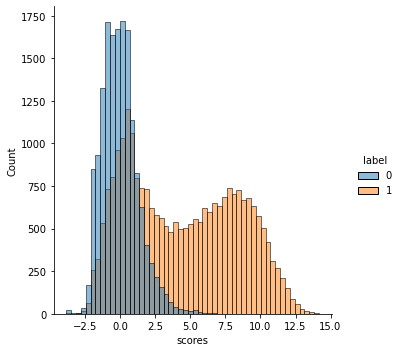

In [173]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [174]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [175]:
function_check

,label,scores,type
0,-4.994547,0.0,Target
1,-4.986526,0.0,Target
2,-4.978504,0.0,Target
3,-4.970482,0.0,Target
4,-4.962461,0.0,Target
...,...,...,...
995,2.987069,0.0,Target
996,2.995091,0.0,Target
997,3.003112,0.0,Target
998,3.011134,0.0,Target


In [176]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

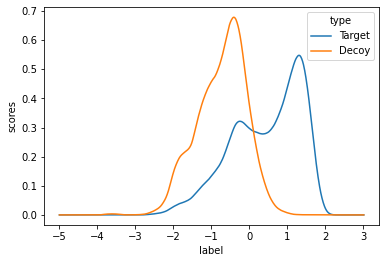

In [177]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [178]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00070422, 0.        , 0.00162258, ..., 0.00949106, 0.00982631,
       0.00941716])

In [179]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00070422, 0.        , 0.00162258, ..., 0.00949106, 0.00982631,
       0.00941716])